In [5]:
import pandas as pd
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [19]:
data=pd.read_csv("D:\examples\pes2021-all-players_modified.csv")

In [20]:
data.head()

,name,shirt_number,team_name,league,nationality,region,height,weight,age,foot,...,skill_super_sub,com_playing_style_trickster,com_playing_style_mazing_run,com_playing_style_speeding_bullet,com_playing_style_incisive_run,com_playing_style_early_cross,com_playing_style_long_ball_expert,com_playing_style_long_ranger,ball_color,rating_stars
0,L. MESSI,10,FC BARCELONA,Spanish League,ARGENTINA,South America,170,72,33,Left foot,...,0,1,1,1,1,1,0,0,black,5
1,C. RONALDO,7,JUVENTUS,Serie A TIM,PORTUGAL,Europe,187,83,35,Right foot,...,0,1,1,1,1,0,0,1,black,5
2,R. LEWANDOWSKI,9,FC BAYERN MÜNCHEN,Other European Leagues,POLAND,Europe,185,79,32,Right foot,...,0,0,0,0,1,0,0,0,black,5
3,NEYMAR,10,PSG,Ligue 1 Uber Eats,BRAZIL,South America,175,68,28,Right foot,...,0,1,1,1,1,0,0,0,black,5
4,K. DE BRUYNE,17,MANCHESTER B,English League,BELGIUM,Europe,181,68,29,Right foot,...,0,0,1,0,0,1,1,1,black,5


In [21]:
data.loc[:,['name','defensive_awareness','finishing']].to_csv('D:\examples\pes2021-all-players_modified_KMeans.csv')
my_data=pd.read_csv("D:\examples\pes2021-all-players_modified_KMeans.csv")

In [22]:
my_data.head()

,Unnamed: 0,name,defensive_awareness,finishing
0,0,L. MESSI,45,95
1,1,C. RONALDO,50,91
2,2,R. LEWANDOWSKI,50,92
3,3,NEYMAR,45,87
4,4,K. DE BRUYNE,66,83


In [23]:
my_data=my_data.drop('Unnamed: 0', axis=1)

In [24]:
my_data.head()

,name,defensive_awareness,finishing
0,L. MESSI,45,95
1,C. RONALDO,50,91
2,R. LEWANDOWSKI,50,92
3,NEYMAR,45,87
4,K. DE BRUYNE,66,83


Text(0, 0.5, 'Finishing')

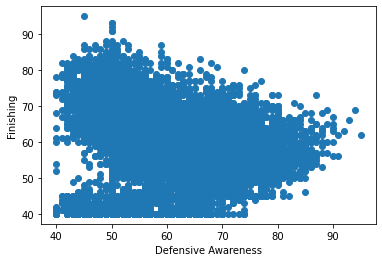

In [26]:
plt.scatter(my_data.defensive_awareness,my_data.finishing)
plt.xlabel('Defensive Awareness')
plt.ylabel('Finishing')

In [27]:
n_clusters = 4
spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=0)
y_predicted = spectral.fit_predict(my_data[['defensive_awareness','finishing']])
y_predicted

array([1, 1, 1, ..., 1, 1, 1])

In [28]:
my_data['cluster']=y_predicted
my_data.head()

,name,defensive_awareness,finishing,cluster
0,L. MESSI,45,95,1
1,C. RONALDO,50,91,1
2,R. LEWANDOWSKI,50,92,1
3,NEYMAR,45,87,1
4,K. DE BRUYNE,66,83,1


No handles with labels found to put in legend.


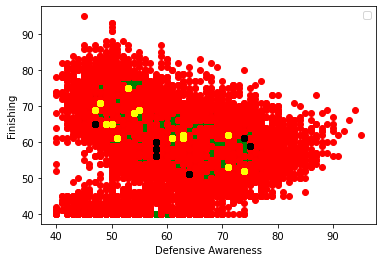

In [30]:
df1 = my_data[my_data.cluster==0]
df2 = my_data[my_data.cluster==1]
df3 = my_data[my_data.cluster==2]
df4 = my_data[my_data.cluster==3]
plt.scatter(df1.defensive_awareness,df1.finishing,color='green')
plt.scatter(df2.defensive_awareness,df2.finishing,color='red')
plt.scatter(df3.defensive_awareness,df3.finishing,color='black')
plt.scatter(df4.defensive_awareness,df4.finishing,color='yellow')
plt.xlabel('Defensive Awareness')
plt.ylabel('Finishing')
plt.legend()